# Correlation fcs (XX and ZZ) for JC MPS

Recall our $\theta \in [3 \sqrt{\pi}/n |n \in [1,..9]] $ and $L \in [10,30,100,200,800]$

In [1]:
import numpy as np
import ast
from scipy.stats import unitary_group
import matplotlib.pyplot as plt
from quimb import *
from quimb.tensor import *
import sympy as sym

from joblib import Parallel, delayed
import pandas as pd
import time

import scipy as sp
from scipy import linalg
import pickle

from JC_functions import *

In [2]:
N_list = [10, 30, 100, 200, 800]
theta_list = [3*np.sqrt(np.pi)/i for i in range(1,10)]

## Unpickle MPS for JC and Motzkin sttates

In [3]:
with open('JC_MPS.pickle', 'rb') as file:
    JC_MPS_dict = pickle.load(file)

EOFError: Ran out of input

Define corr fcns:

In [9]:
Z_A, Z_B = [np.kron(pauli('Z'), np.eye(2)), np.kron(np.eye(2),pauli('Z'))]
X_A, X_B = [np.kron(pauli('X'), np.eye(2)), np.kron(np.eye(2),pauli('X'))]


#for Motz
Zspin1 = pauli('Z', dim=3)
Xspin1 = pauli('X', dim=3)

We will use parallelization in what follows but we need to break it up into once cell per theta because cpu cant hand multiple L =800 calculations per run without crashing

In [34]:
def ZZ(stuff):
    data, x = stuff
    return np.real(JC_MPS_dict[data].correlation(Z_A+Z_B, 2,x))

def XX(stuff):
    data, x = stuff
    return np.real(JC_MPS_dict[data].correlation(X_A+X_B, 2,x))

Lets give things a try: run for fixed theta and append to csv

In [29]:
for theta in theta_list[1:]:
    #first do ZZ data
    for N in N_list:
        t1 = time.time()
        x_data = list(range(2,N,int(N/20)+1))
        stuff_list = [[(theta,N), x] for x in x_data]
        
        ZZ_result = Parallel(n_jobs=-1)(delayed(ZZ)(stuff) for stuff in stuff_list)
        ZZ_data = {'data_dictionary': str([theta, N]), 'x_data': str(x_data), 'ZZ_data': str(ZZ_result)}
        ZZ_df = pd.DataFrame(ZZ_data, index=[0])
        ZZ_df.to_csv('ZZ.csv', mode='a', header=False, index = False)
        t2 = time.time()
        print(f'done with round of length {N} and it took {t2-t1} seconds')

done with round of length 10 and it took 18.41816997528076 seconds
done with round of length 30 and it took 25.025104522705078 seconds
done with round of length 100 and it took 26.760475397109985 seconds
done with round of length 200 and it took 28.273147583007812 seconds
done with round of length 800 and it took 206.737957239151 seconds
done with round of length 10 and it took 12.242265224456787 seconds
done with round of length 30 and it took 22.721994161605835 seconds
done with round of length 100 and it took 23.585844039916992 seconds
done with round of length 200 and it took 24.6839861869812 seconds
done with round of length 800 and it took 174.20477938652039 seconds
done with round of length 10 and it took 13.128798484802246 seconds
done with round of length 30 and it took 20.614906311035156 seconds
done with round of length 100 and it took 26.233158111572266 seconds
done with round of length 200 and it took 24.86655616760254 seconds
done with round of length 800 and it took 177.

## Now do the same for XX data

In [35]:
for theta in theta_list:
    #first do XX data
    for N in N_list:
        t1 = time.time()
        x_data = list(range(2,N,int(N/20)+1))
        stuff_list = [[(theta,N), x] for x in x_data]
        
        XX_result = Parallel(n_jobs=-1)(delayed(XX)(stuff) for stuff in stuff_list)
        XX_data = {'data_dictionary': str([theta, N]), 'x_data': str(x_data), 'XX_data': str(XX_result)}
        XX_df = pd.DataFrame(XX_data, index=[0])
        XX_df.to_csv('XX.csv', mode='a', header=False, index = False)
        t2 = time.time()
        print(f'done with round of length {N} and it took {t2-t1} seconds')

done with round of length 10 and it took 21.01043200492859 seconds
done with round of length 30 and it took 24.184576749801636 seconds
done with round of length 100 and it took 27.04251503944397 seconds
done with round of length 200 and it took 26.34411358833313 seconds
done with round of length 800 and it took 187.73024678230286 seconds
done with round of length 10 and it took 13.104233741760254 seconds
done with round of length 30 and it took 18.65590214729309 seconds
done with round of length 100 and it took 24.88880944252014 seconds
done with round of length 200 and it took 25.018303871154785 seconds
done with round of length 800 and it took 196.76593399047852 seconds
done with round of length 10 and it took 13.005044221878052 seconds
done with round of length 30 and it took 21.069958925247192 seconds
done with round of length 100 and it took 25.525724172592163 seconds
done with round of length 200 and it took 25.74123740196228 seconds
done with round of length 800 and it took 182.

# Now lets do this for Motzkin also:

In [5]:
with open('Motz_MPS.pickle', 'rb') as file:
    Motz_MPS_dict = pickle.load(file)

In [6]:
def ZZMotz(stuff):
    data, x = stuff
    return np.real(Motz_MPS_dict[data].correlation(Zspin1, 2,x))

def XXMotz(stuff):
    data, x = stuff
    return np.real(Motz_MPS_dict[data].correlation(Xspin1, 2,x))

In [10]:
#first do ZZ data
for N in N_list:
    t1 = time.time()
    x_data = list(range(2,N,int(N/20)+1))
    stuff_list = [[N, x] for x in x_data]
    
    ZZ_result = Parallel(n_jobs=-1)(delayed(ZZMotz)(stuff) for stuff in stuff_list)
    ZZ_data = {'data_dictionary': str(N), 'x_data': str(x_data), 'ZZ_data': str(ZZ_result)}
    ZZ_df = pd.DataFrame(ZZ_data, index=[0])
    ZZ_df.to_csv('ZZMotz.csv', mode='a', header=False, index = False)
    t2 = time.time()
    print(f'done with round of length {N} and it took {t2-t1} seconds')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/quimb/core.py:34: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 8 vs 1.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/quimb/core.py:34: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 8 vs 1.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/quimb/core.py:34: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 8 vs 1.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/quimb/core.py:34: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 8 vs 1.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

done with round of length 10 and it took 2.5781090259552 seconds
done with round of length 30 and it took 1.2496321201324463 seconds
done with round of length 100 and it took 3.908540964126587 seconds
done with round of length 200 and it took 7.765695810317993 seconds
done with round of length 800 and it took 194.10240173339844 seconds


In [11]:
#first do XX data
for N in N_list:
    t1 = time.time()
    x_data = list(range(2,N,int(N/20)+1))
    stuff_list = [[N, x] for x in x_data]
    
    XX_result = Parallel(n_jobs=-1)(delayed(XXMotz)(stuff) for stuff in stuff_list)
    XX_data = {'data_dictionary': str(N), 'x_data': str(x_data), 'XX_data': str(XX_result)}
    XX_df = pd.DataFrame(XX_data, index=[0])
    XX_df.to_csv('XXMotz.csv', mode='a', header=False, index = False)
    t2 = time.time()
    print(f'done with round of length {N} and it took {t2-t1} seconds')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/quimb/core.py:34: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 8 vs 1.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/quimb/core.py:34: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 8 vs 1.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/quimb/core.py:34: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 8 vs 1.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/quimb/core.py:34: UserWarning: 'NUMBA_NUM_THREADS' has been set elsewhere and doesn't match the value 'quimb' has tried to set - 8 vs 1.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

done with round of length 10 and it took 2.8904733657836914 seconds
done with round of length 30 and it took 1.3095149993896484 seconds
done with round of length 100 and it took 4.137630939483643 seconds
done with round of length 200 and it took 8.061969757080078 seconds
done with round of length 800 and it took 192.03184390068054 seconds


# Now lets retrieve data from the csv file and plot it

In [ ]:
def get_list_values(column_value):
    
    """
    Convvert a string array to actual array for first elt in a pd.Series
    """
    
    return ast.literal_eval(str(column_value.values[0]))

Text(0.5, 1.0, '[1.772453850905516, 800]')

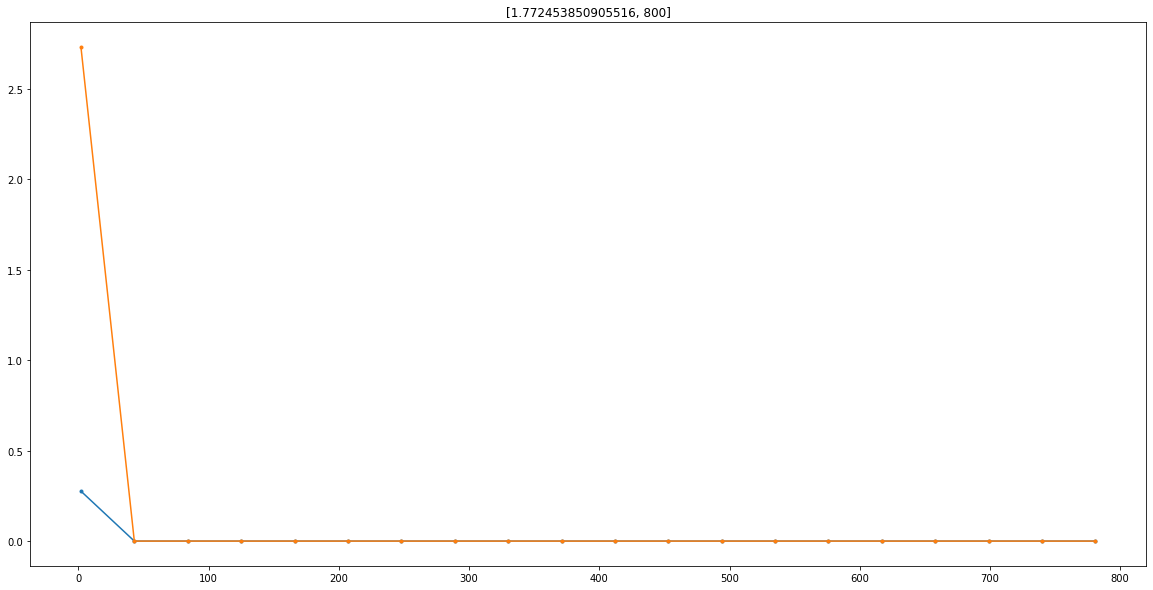

In [ ]:
dfZ = pd.read_csv('ZZ.csv', names=['dict', 'x_data', 'Z_data'],)
dfX = pd.read_csv('XX.csv', names=['dict', 'x_data', 'X_data'],)

key = df['dict'].values[14]	


x_list = get_list_values(dfZ[dfZ['dict']==key]['x_data'])
ZZ_list = get_list_values(dfZ[dfZ['dict']==key]['Z_data'])
XX_list = get_list_values(dfX[dfX['dict']==key]['X_data'])

plt.figure(figsize = (20,10))
plt.plot(x_list,ZZ_list, '.-')
plt.plot(x_list,XX_list, '.-')

plt.title(key)

In [ ]:
df['dict'].values

array(['[5.317361552716548, 10]', '[5.317361552716548, 30]',
       '[5.317361552716548, 100]', '[5.317361552716548, 200]',
       '[5.317361552716548, 800]', '[2.658680776358274, 10]',
       '[2.658680776358274, 30]', '[2.658680776358274, 100]',
       '[2.658680776358274, 200]', '[2.658680776358274, 800]',
       '[1.772453850905516, 10]', '[1.772453850905516, 30]',
       '[1.772453850905516, 100]', '[1.772453850905516, 200]',
       '[1.772453850905516, 800]', '[1.329340388179137, 10]',
       '[1.329340388179137, 30]', '[1.329340388179137, 100]',
       '[1.329340388179137, 200]', '[1.329340388179137, 800]',
       '[1.0634723105433097, 10]', '[1.0634723105433097, 30]',
       '[1.0634723105433097, 100]', '[1.0634723105433097, 200]',
       '[1.0634723105433097, 800]', '[0.886226925452758, 10]',
       '[0.886226925452758, 30]', '[0.886226925452758, 100]',
       '[0.886226925452758, 200]', '[0.886226925452758, 800]',
       '[0.7596230789595069, 10]', '[0.7596230789595069, 30]',

In [ ]:
get_list_values(df[df['dict']=='[5.317361552716548, 30]']['x_data'])

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]